Accuracy: 0.3181818181818182

Classification Report:
                      precision    recall  f1-score   support

     Banarasi Saree       0.50      0.50      0.50         2
     Chanderi Saree       0.00      0.00      0.00         0
       Cotton Saree       0.00      0.00      0.00         2
        Dhoti Kurta       0.50      0.50      0.50         2
Formal Kurta Pajama       0.00      0.00      0.00         0
              Frock       1.00      1.00      1.00         1
       Ghagra Choli       1.00      1.00      1.00         2
       Kurta Pajama       0.00      0.00      0.00         1
       Pathani Suit       1.00      1.00      1.00         1
      Salwar Kameez       0.00      0.00      0.00         1
        Salwar Suit       0.50      1.00      0.67         1
              Saree       0.00      0.00      0.00         2
           Sherwani       0.00      0.00      0.00         0
  Silk Kurta Pajama       0.00      0.00      0.00         3
       Simple Kurta       0.00

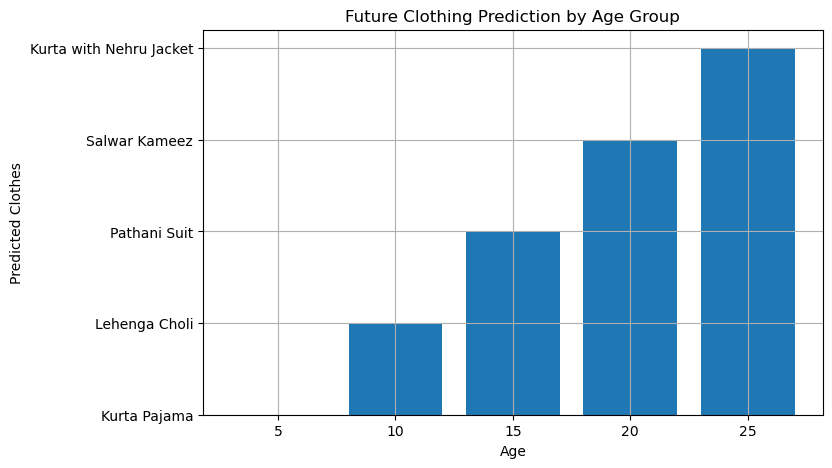

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

df = pd.read_csv("Clothing_Classification.csv")

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_clothes = LabelEncoder()
df['Clothes_Label'] = le_clothes.fit_transform(df['Clothes'])

X = df[['Age', 'Gender']]
y = df['Clothes_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
used_labels = unique_labels(y_test, y_pred)
used_names = le_clothes.inverse_transform(used_labels)
print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, labels=used_labels, target_names=used_names, zero_division=0)

print("\nClassification Report:\n",report)


future_data = pd.DataFrame({
    'Age': [5, 10, 15, 20, 25],
    'Gender': le_gender.transform(['Male', 'Female', 'Male', 'Female', 'Male'])
})

future_preds = model.predict(future_data)
future_labels = le_clothes.inverse_transform(future_preds)

future_data['Predicted_Clothes'] = future_labels
print("\nFuture Trend Prediction:\n", future_data)

plt.figure(figsize=(8, 5))
plt.bar(future_data['Age'].astype(str), future_data['Predicted_Clothes'])
plt.title('Future Clothing Prediction by Age Group')
plt.xlabel('Age')
plt.ylabel('Predicted Clothes')
plt.grid(True)
plt.show()